# Determining bounds [-M1, M2]

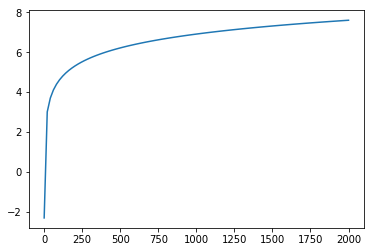

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1, 2000, 100)
y = np.log(x)

plt.plot(x, y)

# Variables

In [34]:
Nx = 100
Nt = 100

r = 0.04
sigma = 0.30
T = 1
K = 99
s_0 = 100

x = np.linspace(0, 6, Nx)
upper_bound = np.exp(max(x))

dt = T/Nt
dx = upper_bound/Nx

initial_values = [max(0, np.exp(i) - K) for i in x]

print(upper_bound)

403.4287934927351


# Initializing first row of grid points and boundary conditions

In [28]:
#Vector of grid points
def initialize_grid(K, Nx, upper_bound, boundary):
    grid_vec = [max(0, np.exp(i) - K) for i in np.linspace(0, 6, Nx)]
    
    #Dirichlet Boundary conditions
    if boundary == 'dirichlet':
        grid_vec[0] = 0
        grid_vec[-1] = upper_bound
        
    #if boundary == 'Neumann':
        #grid_vec[0]
    
    return(grid_vec)

# FTCS

In [37]:
import scipy.sparse as sp
import numpy as np

#Returns next time period of option values (grid_vec t+1) 
#This does the iteration NOT in matrix vector notation
def ftcs_iteration(r, sigma, Nx, Nt, upper_bound, T, K, boundary):
    
    grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')
    
    dx = upper_bound/Nx
    dt = T/Nt
    
    c1 = r - 0.5*(sigma**2)*(dt/dx**2)
    c2 = 0.5*(sigma**2)*(dt/dx**2)
    
    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[-1] = 0
    
    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[-1] = 0
    
    new_grid_vec = (1-r*dt)*np.identity(Nx).dot(grid_vec) + (c1*A.dot(grid_vec) + c2*B.dot(grid_vec))
    new_grid_vec[-1] = upper_bound
    
    return new_grid_vec

ftcs_iteration(r, sigma, Nx, Nt, upper_bound, T, K, 'dirichlet')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# FTCS - Compute Matrices A and B for $B*V^{n+1} = A*V^n$


In [58]:
#For FTCS the scheme can be simplified to two tridiagonal matrix multiplications

#In this case B is the identity matrix, so only the diagonals of A will be computed here

def compute_matrix_FTCS(r, sigma, Nx, Nt, upper_bound, T):
    
    grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')
    
    c1 = r - 0.5*(sigma**2)*(dt/dx**2)
    c2 = 0.5*(sigma**2)*(dt/dx**2)

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0,0], A[0,1], A[0,2]  = 0, 0, 0
    A[99, 98] = 0
    #print(np.array(A))

    
    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0,0], B[0,1], B[0,2]  = 0, 0, 0
    B[99, 98] = 0

    print((1-r*dt)*np.identity(Nx) + c1*A + c2*B)
    
compute_matrix_FTCS(r, sigma, Nx, Nt, upper_bound, T)


[[ 0.9996     0.         0.        ...  0.         0.         0.       ]
 [ 0.04       0.9995447 -0.0399447 ...  0.         0.         0.       ]
 [ 0.         0.04       0.9995447 ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.9995447 -0.0399447  0.       ]
 [ 0.         0.         0.        ...  0.04       0.9995447 -0.0399447]
 [ 0.         0.         0.        ...  0.         0.         0.9995447]]


# Crank Nicholson

In [ ]:
def compute_matrix_CN(r, sigma, Nx, Nt, upper_bound, T):
    
    grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')
    
    c1 = r - 0.5*(sigma**2)*(dt/dx**2)
    c2 = 0.5*(sigma**2)*(dt/dx**2)

    A = sp.sparse.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[-1] = 0

    B = sp.sparse.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[-1] = 0

    v_new = ((1-r*dt)*np.identity(Nx) + c1*A + c2*B).dot(grid_vec)

    print((1-r*dt)*np.identity(Nx) + c1*A + c2*B)
    
compute_matrix_CN(r, sigma, Nx, Nt, upper_bound, T)